In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !pip install folium


In [ ]:

 

 

import pandas as pd

dict_1 = {
    'col1': [4, 1, 5, 3, 2],
    'col2': [6, 7, 8, 9, 10],
    'col3': [11, 12, 13, 14, 15],
    'col4': [16, 17, 18, 19, 20]
}

df_1 = pd.DataFrame(dict_1)
print(df_1)

print(df_1.iterrows())
for idx,it in df_1.iterrows():
    print(type(it['col1']))

   col1  col2  col3  col4
0     4     6    11    16
1     1     7    12    17
2     5     8    13    18
3     3     9    14    19
4     2    10    15    20
<generator object DataFrame.iterrows at 0x7f1656003750>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#### 라이브러리 ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
## config
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#### data
df1 = pd.read_csv('/content/drive/MyDrive/1.ev_app_resident.csv')
df2 = pd.read_csv('/content/drive/MyDrive/2.ev_app_activity.csv')
df3 = pd.read_csv('/content/drive/MyDrive/3.ev_app_activity_resident.csv')

# EDA

In [ ]:
df1

,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust
0,20220605,7,4146,용인시,41463572,동백1동,86135034,127.152250,37.286300,MALE,6,EV라운지,5,3.522
1,20220625,6,4146,용인시,41465580,상현2동,84375196,127.090080,37.309536,MALE,8,파워큐브차저,2,4.231
2,20220614,2,4146,용인시,41461250,포곡읍,87958893,127.216600,37.274303,FEMALE,14,EV라운지,1,18.440
3,20220619,7,4146,용인시,41465530,신봉동,84119243,127.080970,37.323480,MALE,13,EV라운지,2,4.335
4,20220624,5,4146,용인시,41465580,상현2동,84423187,127.091780,37.306840,MALE,8,EV라운지,4,4.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292038,20220605,7,4146,용인시,41465570,상현1동,84071205,127.079384,37.304993,MALE,2,EV라운지,3,5.082
292039,20220607,2,4146,용인시,41461510,중앙동,87286847,127.193080,37.234580,MALE,3,EV라운지,6,4.585
292040,20220611,6,4146,용인시,41461259,남사읍,86630714,127.170300,37.156097,MALE,13,EV라운지,2,6.452
292041,20220618,6,4146,용인시,41461360,양지면,89926672,127.286095,37.230280,MALE,9,EV라운지,6,3.071


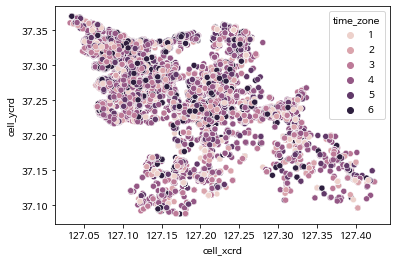

In [ ]:
sns.scatterplot(x = df1['cell_xcrd'], y = df1['cell_ycrd'], hue = df1['time_zone']);

In [ ]:
df1.value_counts('adng_nm')

adng_nm
구갈동      13819
죽전1동     13640
역삼동      13456
성복동      12615
동천동      12160
풍덕천2동    11760
상현1동     11491
신갈동      11129
구성동      11029
신봉동      10955
보라동      10520
풍덕천1동    10395
보정동       9684
동백1동      9627
모현읍       9371
마북동       9325
유림동       9048
상현2동      8940
포곡읍       8872
상하동       8809
동백2동      7431
영덕1동      7264
영덕2동      6726
중앙동       6232
양지면       6091
죽전2동      5808
동백3동      5296
남사읍       5285
이동읍       5053
서농동       4954
기흥동       4527
상갈동       4488
동부동       3020
원삼면       2177
백암면       1046
dtype: int64

In [ ]:
df1['time_zone'].value_counts()

4    91537
3    52764
5    50688
2    39157
6    32383
1    25514
Name: time_zone, dtype: int64

In [ ]:
time = df1.groupby('time_zone', as_index = False)
time.count()

,time_zone,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,count_cust
0,1,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514
1,2,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157
2,3,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764
3,4,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537
4,5,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688
5,6,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383


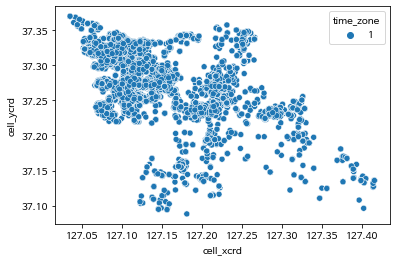

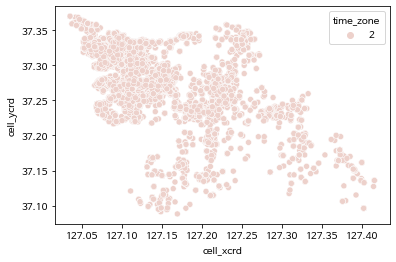

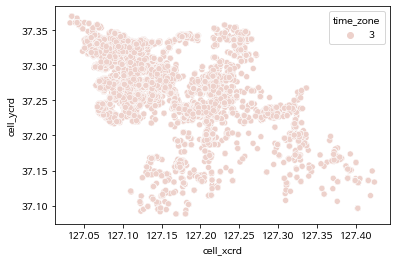

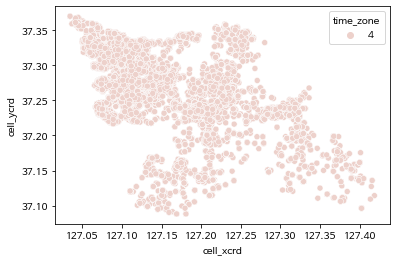

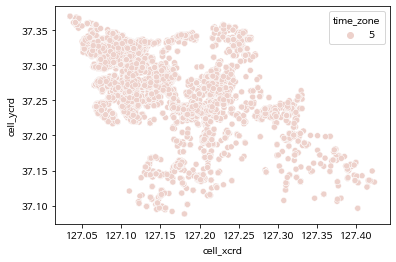

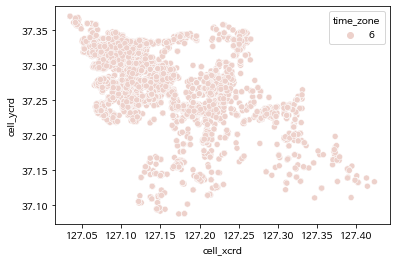

In [ ]:
for i in range(1,7):
    tmp = df1[df1['time_zone'] == i]
    sns.scatterplot(x = 'cell_xcrd', y = 'cell_ycrd',data = tmp, hue = 'time_zone')
    plt.show()

In [ ]:
df1['adng_nm'].value_counts().sort_index()

# df1.groupby('adng_nm', as_index = True).mean().index

구갈동      13819
구성동      11029
기흥동       4527
남사읍       5285
동백1동      9627
동백2동      7431
동백3동      5296
동부동       3020
동천동      12160
마북동       9325
모현읍       9371
백암면       1046
보라동      10520
보정동       9684
상갈동       4488
상하동       8809
상현1동     11491
상현2동      8940
서농동       4954
성복동      12615
신갈동      11129
신봉동      10955
양지면       6091
역삼동      13456
영덕1동      7264
영덕2동      6726
원삼면       2177
유림동       9048
이동읍       5053
죽전1동     13640
죽전2동      5808
중앙동       6232
포곡읍       8872
풍덕천1동    10395
풍덕천2동    11760
Name: adng_nm, dtype: int64

In [ ]:
# dong
dong = df1.groupby('adng_nm', as_index = False).mean()[['adng_nm','cell_xcrd','cell_ycrd']]
dong['dong_cnt'] = df1['adng_nm'].value_counts().sort_index().values

In [ ]:
dong['cell_ycrd'].mean()
dong['cell_xcrd'].mean()

127.14914848299298

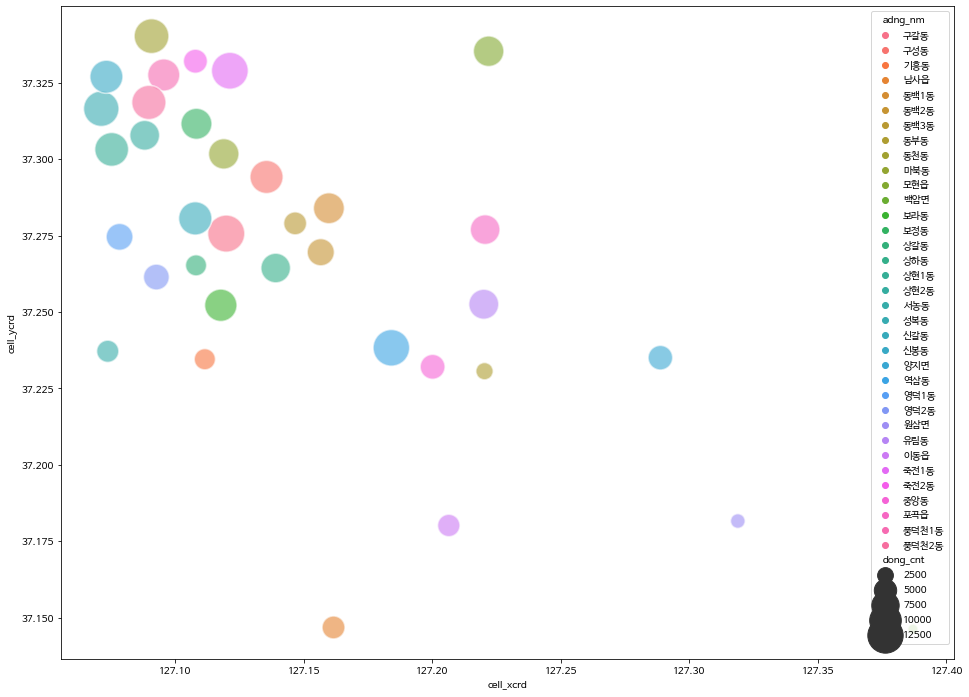

In [ ]:
plt.figure(figsize = (16,12))

dong = df1.groupby('adng_nm', as_index = False).mean()[['adng_nm','cell_xcrd','cell_ycrd']]
dong['dong_cnt'] = df1['adng_nm'].value_counts().sort_index().values

# dong.plot(kind = "scatter", x = 'cell_xcrd',y = 'cell_ycrd', s=dong['dong_cnt']/100, cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

sizes = (df1['adng_nm'].value_counts().min()/10, df1['adng_nm'].value_counts().max()/10)

sns.scatterplot(
    x = 'cell_xcrd',
    y = 'cell_ycrd', 
    data =dong, 
    hue = 'adng_nm',
    size= 'dong_cnt', 
    sizes = sizes,
    alpha = 0.6 );

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 16.7 MB 71.4 MB/s 
     |████████████████████████████████| 6.3 MB 73.6 MB/s 


In [ ]:
# geo판다스를 이용하여 지리정보가 담긴 한국 읍면동 shp파일을 불러옵니다.
## encoding을 euc-kr로 해줘야 한국어 이름이 안깨집니다.
import geopandas as gpd
df_emd = gpd.read_file('/content/drive/MyDrive/emd.shp', encoding='euc-kr')
df_emd.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [ ]:
# 용인시 법정동 코드(4146)가 포함된 읍면동 코드 를 추출하여 용인시 정보만 가져옵니다.
yongin_emd=df_emd[df_emd['EMD_CD'].str.contains('4146')]
yongin_emd.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
1930,41461101,Gimnyangjang-dong,김량장동,"POLYGON ((972534.441 1914777.817, 972538.555 1..."
1931,41461102,Yeokbuk-dong,역북동,"POLYGON ((970687.507 1914084.811, 970690.543 1..."
1932,41461103,Samga-dong,삼가동,"POLYGON ((968883.380 1915827.640, 968919.040 1..."
1933,41461104,Nam-dong,남동,"POLYGON ((975390.738 1913336.340, 975381.710 1..."
1934,41461105,Yubang-dong,유방동,"POLYGON ((970882.250 1918985.891, 970933.314 1..."


In [ ]:
## 위에 보면 좌표가 이상합니다..  표시 안된 것도 좌표 표기 방식 때문이 아닌가도..
### epsg:4226이 지구 표준 좌표계인 WGS 1984더라구요 밑에 코드를 쓰면 변경 가능합니다 
new_df = yongin_emd.to_crs({'init':'epsg:4326'})
new_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
1930,41461101,Gimnyangjang-dong,김량장동,"POLYGON ((127.19037 37.23145, 127.19042 37.231..."
1931,41461102,Yeokbuk-dong,역북동,"POLYGON ((127.16958 37.22514, 127.16962 37.225..."
1932,41461103,Samga-dong,삼가동,"POLYGON ((127.14917 37.24079, 127.14957 37.241..."
1933,41461104,Nam-dong,남동,"POLYGON ((127.22262 37.21853, 127.22252 37.218..."
1934,41461105,Yubang-dong,유방동,"POLYGON ((127.17158 37.26933, 127.17216 37.269..."


In [ ]:
# 이 데이터를 json으로 변경후 
yongin_json = new_df.to_json()

In [ ]:
# 넣어주면 
# style_function을 이용하면 여러 가지 바꿀 수 있을 거 같아요
center = [37.1778, 127.178]

m = folium.Map(location=center, zoom_start=12)
folium.GeoJson(yongin_json,style_function=lambda x: {'fillColor': 'orange'}).add_to(m)
m

# 짠!

In [ ]:
# iter를 돌려서 folium.Popup 표시하면 클릭 시 이름이 뜨게도 가능
center = [37.1778, 127.178]

m = folium.Map(location=center, zoom_start=11)

for _, r in new_df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['EMD_KOR_NM']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
import time

In [ ]:
start = time.time()

for _, r in new_df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['EMD_KOR_NM']).add_to(geo_j)
    geo_j.add_to(m)
m
print("time :", time.time() - start)

time : 0.1284492015838623


In [ ]:
start = time.time()

for r in new_df.index:
    sim_geo = gpd.GeoSeries(new_df.loc[r,'geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(new_df.loc[r,'EMD_KOR_NM']).add_to(geo_j)
    geo_j.add_to(m)
print("time :", time.time() - start)

time : 0.15334320068359375
